# Documentation

http://seaborn.pydata.org/
- Statisitcal plotting library, designed to work very well with Pandas dataframe

In [1]:
import seaborn as sns
%matplotlib inline

# Distribution Plots

1. distplot
2. jointplot
3. pairplot
4. rugplot
5. kdeplot

In [2]:
# Built-in dataset

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Distplot
- Distribution of a univariate set of obsrvations

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

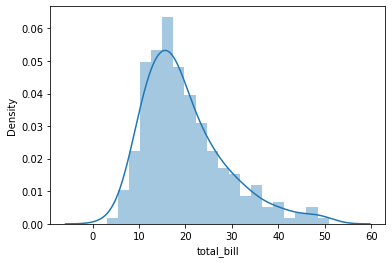

In [6]:
sns.distplot(tips['total_bill'], bins = 20)
# Safe to ignore warnings
# Bins control the number of bars
# To remove KDE , KDE = False

### Jointplot

Match up two distplots for bivariate data. With choice of what **kind** parameter to compare with: 
* “scatter” (Default)
* “reg” 
* “resid” 
* “kde” 
* “hex”

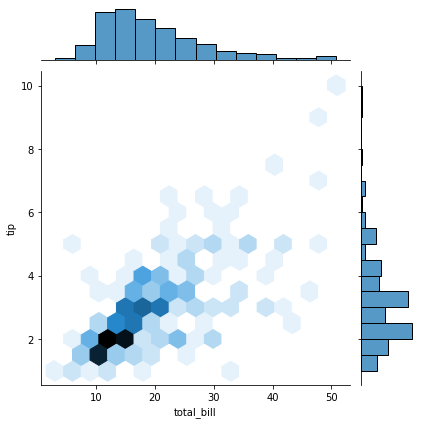

In [13]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

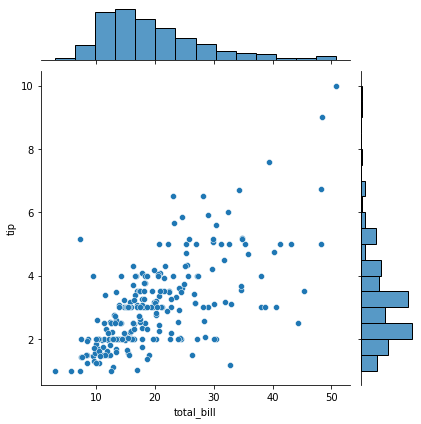

In [14]:
sns.jointplot(x='total_bill',y='tip',data=tips)

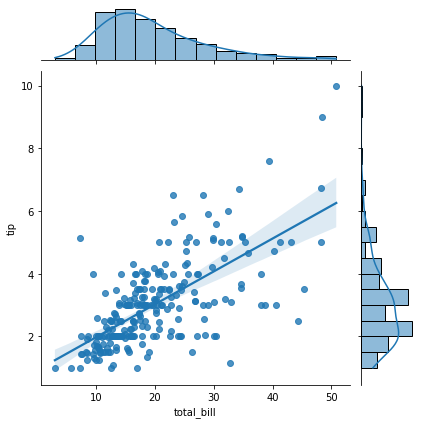

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

### Pairplot

- pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 
- Suitable for quick data visualization

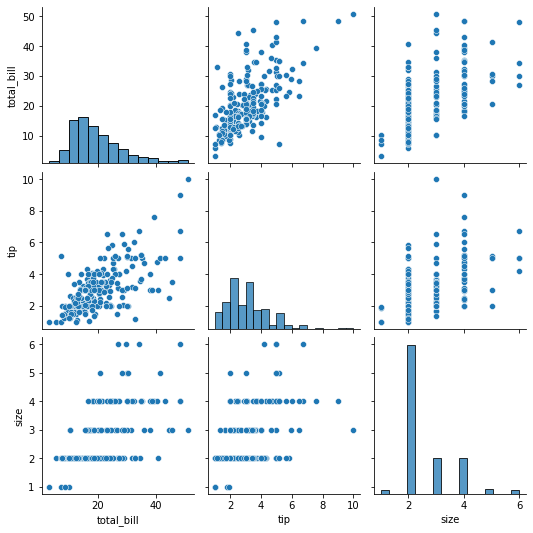

In [16]:
sns.pairplot(tips)

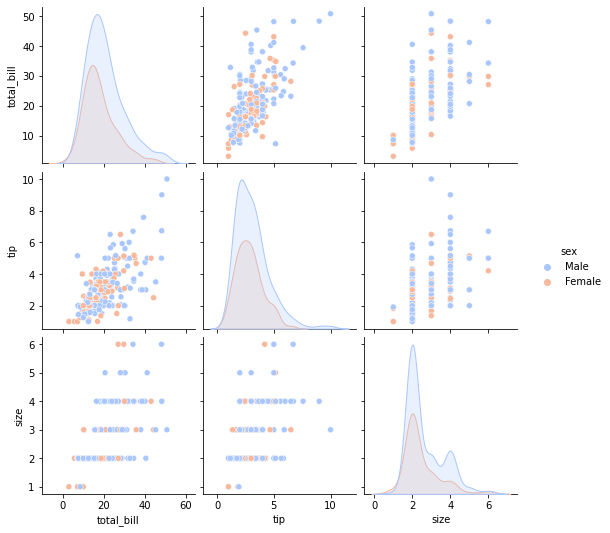

In [17]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

### Rugplot

- they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<AxesSubplot:xlabel='total_bill'>

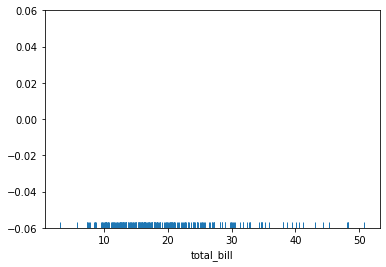

In [18]:
sns.rugplot(tips['total_bill'])

### KDEplot

- deplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value.

(0.0, 1.0)

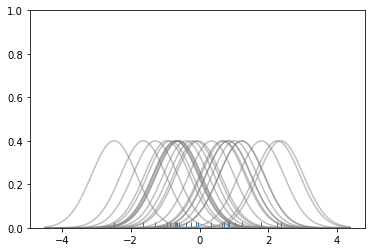

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

dataset = np.random.randn(25)
sns.rugplot(dataset);

x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

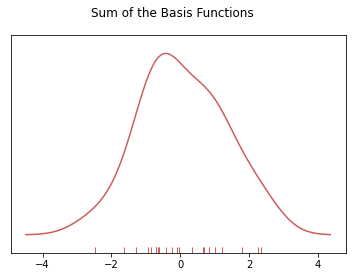

In [20]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])
plt.suptitle("Sum of the Basis Functions")

# Categorical Plots

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

### Bar Plot

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

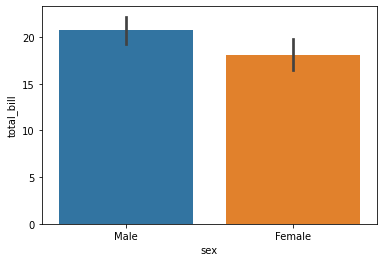

In [3]:
sns.barplot(x='sex',y='total_bill',data=tips)

# x: categorical & y: numerical

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

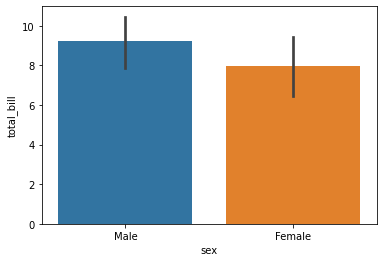

In [4]:
import numpy as np
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)
# estimator's default : mean 
# Estimator : Statistical function to estimate within each categorical bin

### Count Plot
 same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value

<AxesSubplot:xlabel='sex', ylabel='count'>

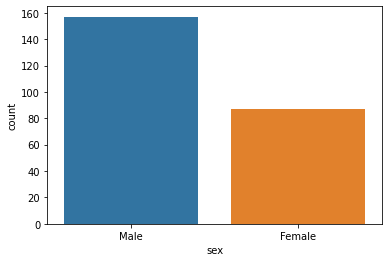

In [5]:
sns.countplot(x='sex',data=tips)

### Box Plot

boxplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

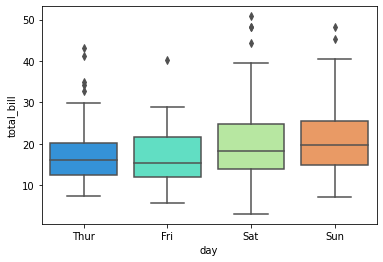

In [12]:
sns.boxplot(x='day',y='total_bill',data=tips,palette='rainbow')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

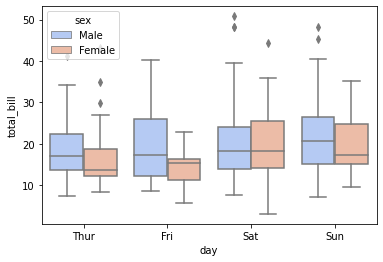

In [9]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='sex',palette='coolwarm')

<AxesSubplot:>

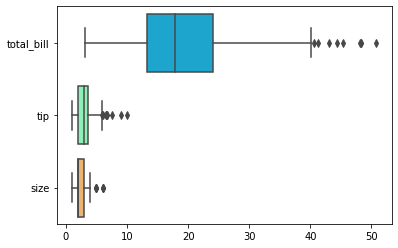

In [10]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

### Violin Plot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

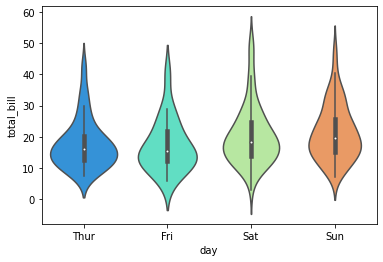

In [16]:
sns.violinplot(x='day',y='total_bill',data=tips,palette='rainbow')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

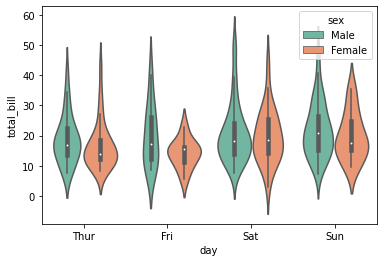

In [19]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',palette='Set2')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

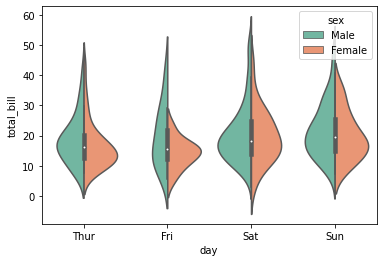

In [20]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set2')

### Strip Plot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution

<AxesSubplot:xlabel='day', ylabel='total_bill'>

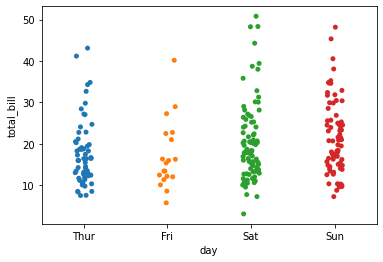

In [22]:
sns.stripplot(x='day',y='total_bill',data=tips)

# You can't really tell how many plots are stacked on top of each other

<AxesSubplot:xlabel='day', ylabel='total_bill'>

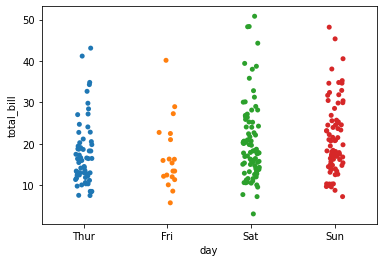

In [24]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)

# Jitter add randm noise 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

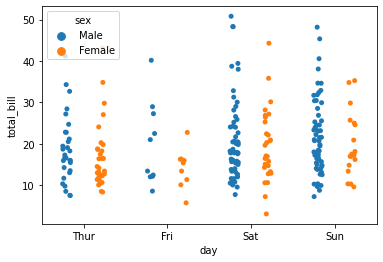

In [28]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',dodge=True)

# Instead of split use dodge

### Swarm Plot
The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

<AxesSubplot:xlabel='day', ylabel='total_bill'>

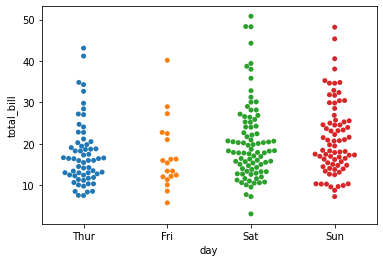

In [30]:
sns.swarmplot(x='day',y='total_bill',data=tips)
#They don't scale that well to very large dataset

<AxesSubplot:xlabel='day', ylabel='total_bill'>

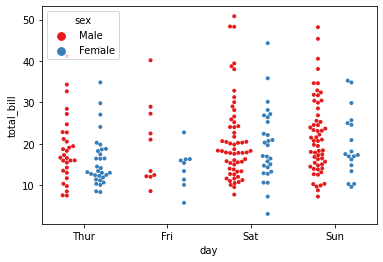

In [34]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", dodge=True,size=4)

### Combining Categorical Plots

<AxesSubplot:xlabel='day', ylabel='total_bill'>

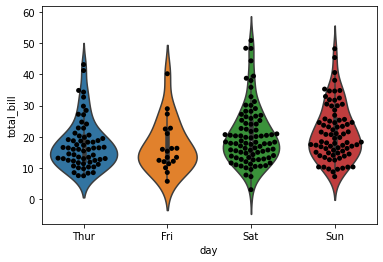

In [37]:
sns.violinplot(x="day", y="total_bill",data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black') 

# Not suitable for presenting

<AxesSubplot:xlabel='tip', ylabel='day'>

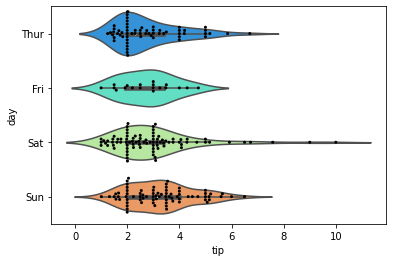

In [38]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

### Cat Plot
catplot is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type:

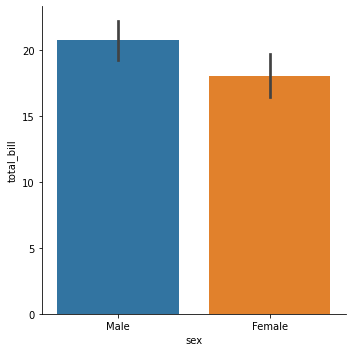

In [42]:
sns.catplot(x='sex',y='total_bill',data=tips,kind='bar')

# default is strip plot